In [ ]:
import numpy as np


class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = {}

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log2(p) for p in ps if p > 0])

    def _gain(self, X, y, feature, value):
        parent_entropy = self._entropy(y)
        left_child, right_child = y[X[:, feature] < value], y[X[:, feature] >= value]
        n = len(y)
        n_left, n_right = len(left_child), len(right_child)
        e_left, e_right = self._entropy(left_child), self._entropy(right_child)
        child_entropy = (n_left / n) * e_left + (n_right / n) * e_right
        return parent_entropy - child_entropy

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        if (n_labels == 1 or
            depth == self.max_depth or
            n_samples < 2):
            leaf_value = np.argmax(np.bincount(y))
            return leaf_value

        feature, value = self._best_split(X, y)
        left_child, right_child = X[X[:, feature] < value], X[X[:, feature] >= value]
        left_y, right_y = y[X[:, feature] < value], y[X[:, feature] >= value]

        tree = {'feature': feature, 'value': value}
        tree['left'] = self._grow_tree(left_child, left_y, depth + 1)
        tree['right'] = self._grow_tree(right_child, right_y, depth + 1)

        return tree

    def _best_split(self, X, y):
        best_gain = -1
        best_feature, best_value = None, None

        for feature in range(X.shape[1]):
            X_column = X[:, feature]
            values = np.unique(X_column)
            for value in values:
                gain = self._gain(X, y, feature, value)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_value = value

        return best_feature, best_value

    def fit(self, X, y):
        self.tree = self._grow_tree(X, y)

    def predict(self, X):
        return [self._predict(inputs) for inputs in X]

    def _predict(self, inputs):
        tree = self.tree
        while isinstance(tree, dict):
            feature = tree['feature']
            value = tree['value']
            if inputs[feature] < value:
                tree = tree['left']
            else:
                tree = tree['right']

        return tree



In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate sample data
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train decision tree
model = DecisionTree(max_depth=5)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate model
accuracy = np.sum(predictions == y_test) / len(y_test)
print(f"Accuracy: {accuracy:.2f}")

# Plot decision boundary
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
x_min, x_max = X_test[:, 0].min(), X_test[:, 0].max()
y_min, y_max = X_test[:, 1].min(), X_test[:, 1].max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max), np.linspace(y_min, y_max))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, alpha=0.8)
plt.show()

decision boundary

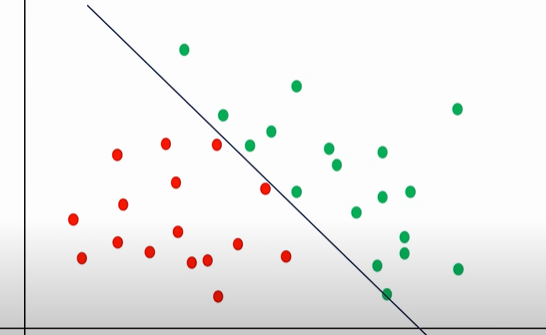

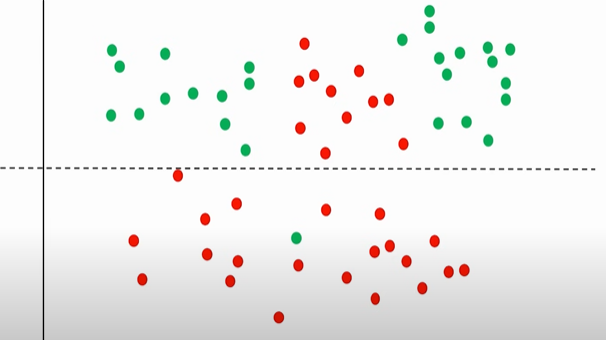

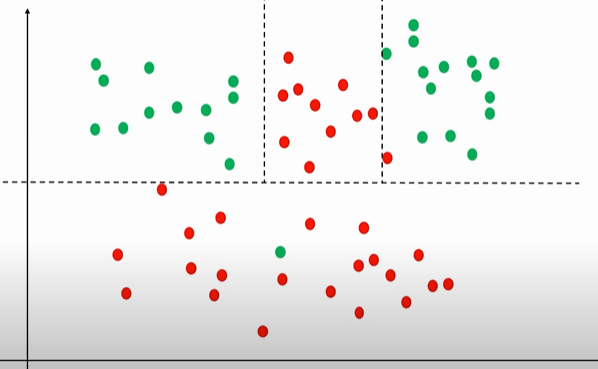

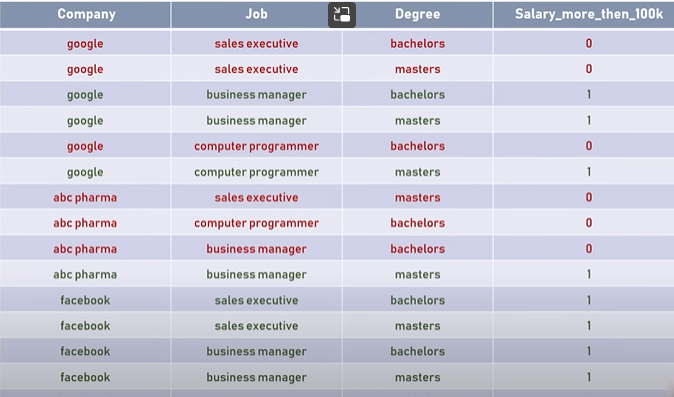

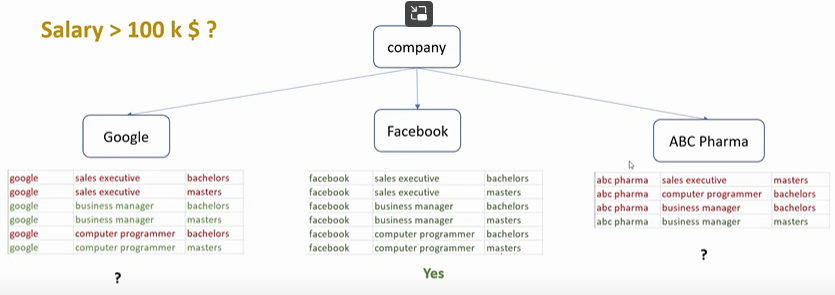

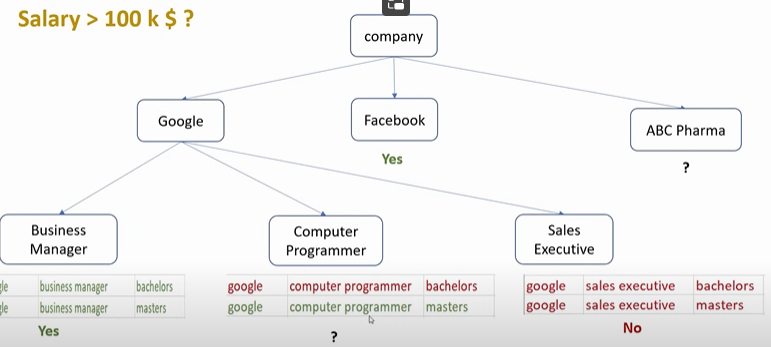

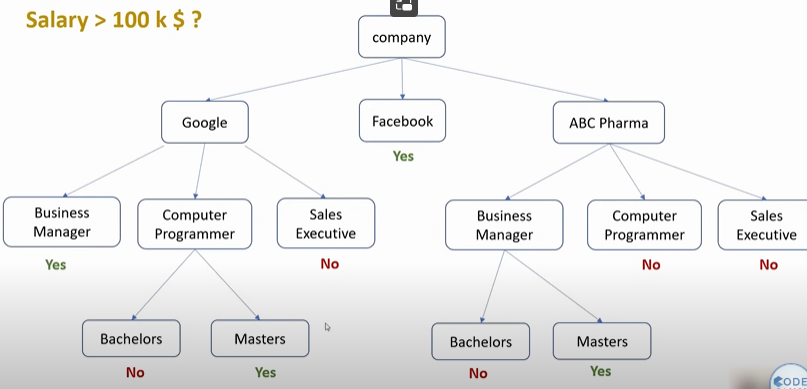

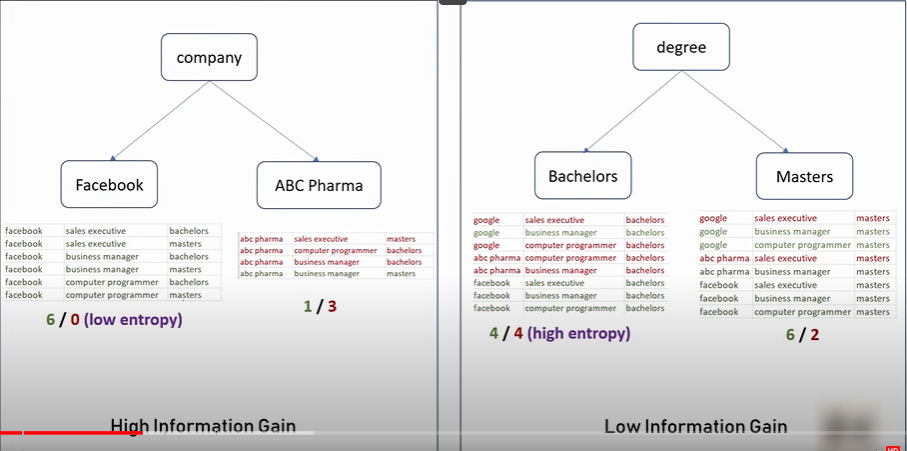

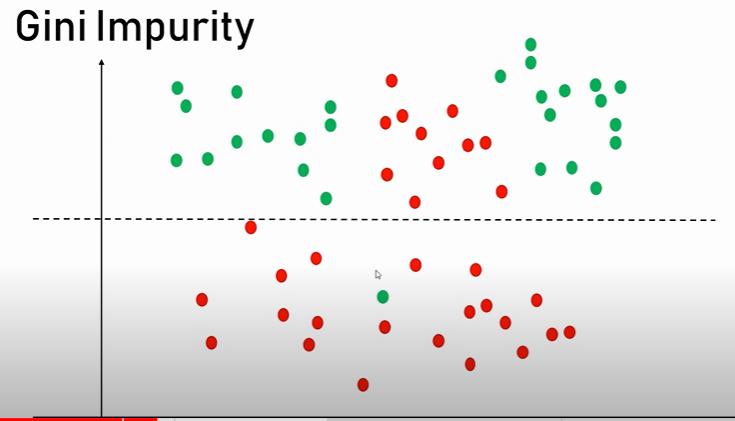

In [6]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv("salaries.csv")

In [8]:
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [9]:

inputs = df.drop('salary_more_then_100k',axis='columns')

In [10]:
inputs

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,facebook,software engineer,bachelors
6,facebook,software engineer,masters
7,apple,software engineer,bachelors
8,apple,software engineer,masters
9,amazon,software engineer,bachelors


In [22]:
arr = np.array(inputs)

NameError: name 'np' is not defined

In [12]:
arr

NameError: name 'arr' is not defined

In [13]:
target = df['salary_more_then_100k']

In [18]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [15]:
le_encode = LabelEncoder()

In [19]:
or_encode = OrdinalEncoder()

you can also use for loop

In [16]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()

# # Assume df is your DataFrame
# columns_to_encode = ['column1', 'column2', 'column3']

# for column in columns_to_encode:
#     df[column] = le.fit_transform(df[column])

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder # not working
from sklearn.pipeline import Pipeline

cat_col = ['company', 'job', 'degree']


cat_pipeline = Pipeline(steps=[('le_en',OrdinalEncoder())])

ct = ColumnTransformer([
    ('le', cat_pipeline, cat_col)
])

df_encoded = ct.fit_transform(inputs)

In [21]:
df_encoded

array([[3., 5., 0.],
       [3., 5., 1.],
       [3., 0., 0.],
       [3., 0., 1.],
       [3., 1., 0.],
       [2., 6., 0.],
       [2., 6., 1.],
       [1., 6., 0.],
       [1., 6., 1.],
       [0., 6., 0.],
       [0., 6., 1.],
       [4., 6., 0.],
       [4., 6., 1.],
       [5., 4., 0.],
       [5., 4., 1.],
       [7., 6., 0.],
       [7., 6., 1.],
       [6., 6., 0.],
       [6., 6., 1.],
       [3., 2., 0.],
       [3., 2., 1.],
       [2., 2., 0.],
       [2., 2., 1.],
       [1., 2., 0.],
       [1., 2., 1.],
       [0., 2., 0.],
       [0., 2., 1.],
       [4., 2., 0.],
       [4., 2., 1.],
       [5., 3., 0.],
       [5., 3., 1.]])

In [23]:
from sklearn import tree

In [24]:
model = tree.DecisionTreeClassifier()

In [26]:
model.fit(df_encoded, target)

DecisionTreeClassifier()


accuracy = (TP + TN) / (TP + TN + FP + FN)

precision = TP / (TP + FP)

recall = TP / (TP + FN)

f1_score = 2 * (precision * recall) / (precision + recall)

In [27]:
model.score(df_encoded,target)

1.0

Is salary of Google, Computer Engineer, Bachelors degree > 100 k ?

In [61]:
user_input = {'company':'google','job':'computer programmer','degree':'bachelors'}

In [62]:
user_input = pd.DataFrame(user_input,index=[0])

In [63]:
user_input

,company,job,degree
0,google,computer programmer,bachelors


In [64]:
user_input = ct.transform(user_input)

In [65]:

model.predict(user_input)

array([0])


Is salary of Google, Computer Engineer, Masters degree > 100 k ?

In [28]:

model.predict([[2,1,1]])

d:\a27_YEARS_OLD\machine_learning\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])